In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [14]:
netflix = pd.read_csv("nflx_price.csv")
netflix.columns = ["Date", "Open", "Close", "High", "Low", "Volume"]
netflix.head()

,Date,Open,Close,High,Low,Volume
0,2018-01-02,196.10,201.07,201.65,195.42,10953631
1,2018-01-03,202.05,205.05,206.21,201.50,8589233
2,2018-01-04,206.20,205.63,207.05,204.00,6024571
3,2018-01-05,207.25,209.99,210.02,205.59,7014360
4,2018-01-08,210.02,212.05,212.50,208.44,5568126


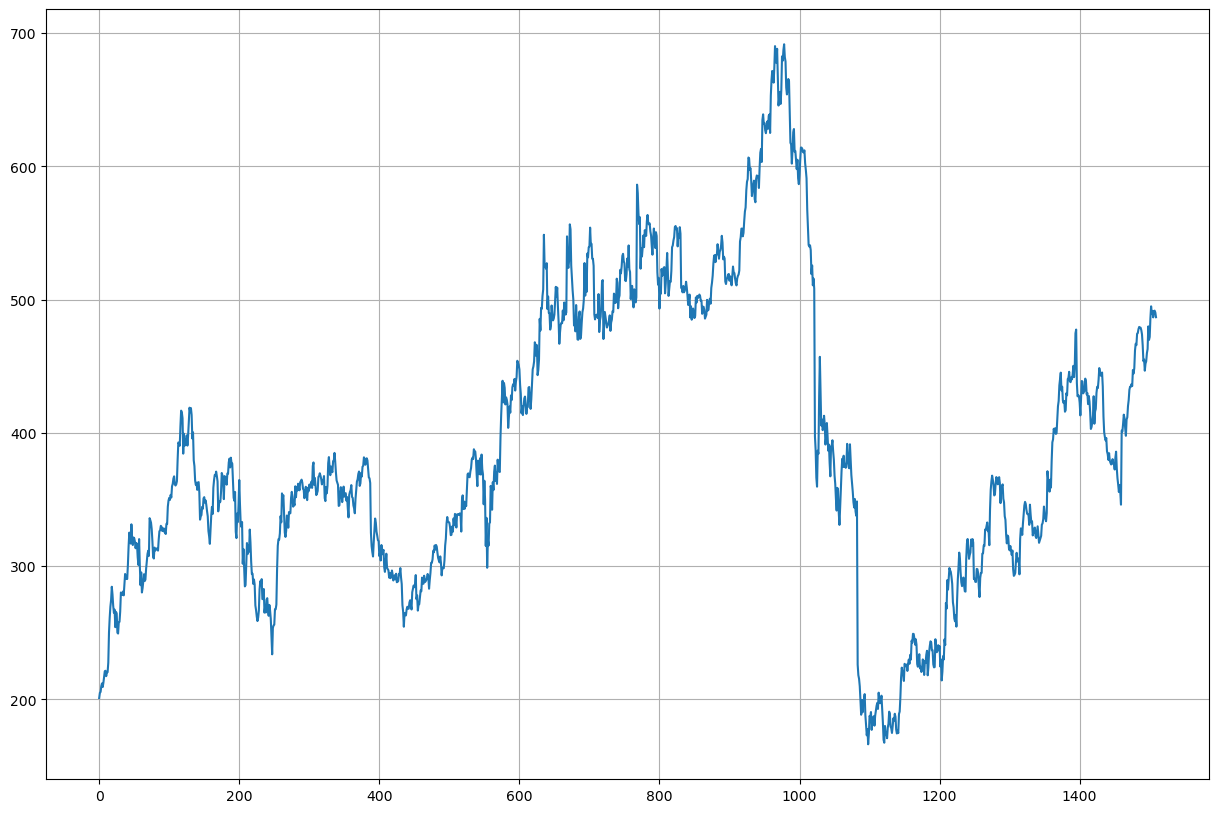

In [15]:
plt.figure(figsize = (15, 10))
netflix["Close"].plot()
plt.grid()

In [16]:
# 종가(Close)를 기준으로 전일 대비 등락 폭 계산
netflix["1d_ROC"] = ((netflix["Close"] - netflix["Close"].shift(1)) / netflix["Close"].shift(1)) * 100
netflix["5d_ROC"] = ((netflix["Close"] - netflix["Close"].shift(5)) / netflix["Close"].shift(5)) * 100
netflix

,Date,Open,Close,High,Low,Volume,1d_ROC,5d_ROC
0,2018-01-02,196.10,201.07,201.65,195.42,10953631,NaN,NaN
1,2018-01-03,202.05,205.05,206.21,201.50,8589233,1.979410,NaN
2,2018-01-04,206.20,205.63,207.05,204.00,6024571,0.282858,NaN
3,2018-01-05,207.25,209.99,210.02,205.59,7014360,2.120313,NaN
4,2018-01-08,210.02,212.05,212.50,208.44,5568126,0.980999,NaN
...,...,...,...,...,...,...,...,...
1505,2023-12-22,494.00,486.76,496.02,485.45,2702672,-0.986554,3.114011
1506,2023-12-26,489.39,491.19,491.48,486.38,2032683,0.910099,1.042952
1507,2023-12-27,491.24,491.79,494.02,489.25,2559832,0.122152,-0.652499
1508,2023-12-28,492.00,490.51,492.89,489.07,1708897,-0.260274,0.253439


In [17]:
# 5일 이동평균 계산
netflix["5MA"] = netflix["Close"].rolling(window=5).mean()

# 120일 이동평균 계산
netflix["120MA"] = netflix["Close"].rolling(window=120).mean()

netflix

,Date,Open,Close,High,Low,Volume,1d_ROC,5d_ROC,5MA,120MA
0,2018-01-02,196.10,201.07,201.65,195.42,10953631,NaN,NaN,NaN,NaN
1,2018-01-03,202.05,205.05,206.21,201.50,8589233,1.979410,NaN,NaN,NaN
2,2018-01-04,206.20,205.63,207.05,204.00,6024571,0.282858,NaN,NaN,NaN
3,2018-01-05,207.25,209.99,210.02,205.59,7014360,2.120313,NaN,NaN,NaN
4,2018-01-08,210.02,212.05,212.50,208.44,5568126,0.980999,NaN,206.758,NaN
...,...,...,...,...,...,...,...,...,...,...
1505,2023-12-22,494.00,486.76,496.02,485.45,2702672,-0.986554,3.114011,489.756,428.004000
1506,2023-12-26,489.39,491.19,491.48,486.38,2032683,0.910099,1.042952,490.770,428.440250
1507,2023-12-27,491.24,491.79,494.02,489.25,2559832,0.122152,-0.652499,490.124,428.887667
1508,2023-12-28,492.00,490.51,492.89,489.07,1708897,-0.260274,0.253439,490.372,429.294333


In [18]:
import ta

H, L, C, V = netflix['High'], netflix['Low'], netflix['Close'], netflix['Volume']

netflix.loc[:,'bol_high'] = ta.volatility.bollinger_hband(C)
netflix.loc[:, 'bol_low']  = ta.volatility.bollinger_lband(C)
netflix.loc[:, 'ADI'] = ta.volume.acc_dist_index(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    fillna=True
)
netflix.loc[:, 'OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)
netflix.loc[:, 'CMF'] = ta.volume.chaikin_money_flow(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    window=20,
    fillna=True
)
netflix.loc[:, 'FI'] = ta.volume.force_index(close=C, volume=V, fillna=True)
netflix.loc[:, 'EOM'] = ta.volume.ease_of_movement(
    high=netflix['High'],
    low=netflix['Low'],
    volume=netflix['Volume'],
    window=20,
    fillna=True
)
netflix.loc[:, 'VPT'] = ta.volume.volume_price_trend(close=C, volume=V, fillna=True)
netflix.loc[:, 'NVI'] = ta.volume.negative_volume_index(close=C, volume=V, fillna=True)
netflix.loc[:, 'VMAP'] = ta.volume.volume_weighted_average_price(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    window=20,
    fillna=True
)
netflix.loc[:, 'ATR'] = ta.volatility.average_true_range(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, 'BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
netflix.loc[:, 'BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)
netflix.loc[:, 'KCH'] = ta.volatility.keltner_channel_hband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, 'KCL'] = ta.volatility.keltner_channel_lband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, 'KCM'] = ta.volatility.keltner_channel_mband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, 'DCH'] = ta.volatility.donchian_channel_hband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, 'DCL'] = ta.volatility.donchian_channel_lband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)

netflix.loc[:, 'DCM'] = ta.volatility.donchian_channel_mband(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, 'UI'] = ta.volatility.ulcer_index(close=C, fillna=True)
netflix.loc[:, 'SMA'] = ta.trend.sma_indicator(close=C, window=20, fillna=True)
netflix.loc[:, 'EMA'] = ta.trend.ema_indicator(close=C, window=20, fillna=True)
netflix.loc[:, 'WMA'] = ta.trend.wma_indicator(close=C, window=20, fillna=True)
netflix.loc[:, 'MACD'] = ta.trend.macd(close=C, fillna=True)
netflix.loc[:, 'ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
netflix.loc[:, '-VI'] = ta.trend.vortex_indicator_neg(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, '+VI'] = ta.trend.vortex_indicator_pos(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window=20,
    fillna=True
)
netflix.loc[:, 'TRIX'] = ta.trend.trix(close=C, fillna=True)
netflix.loc[:, 'MI'] = ta.trend.mass_index(high=H, low=L, fillna=True)
netflix.loc[:, 'CCI'] = ta.trend.cci(high=H, low=L, close=C, window=20, fillna=True)
netflix.loc[:, 'DPO'] = ta.trend.dpo(close=C, fillna=True)
netflix.loc[:, 'KST'] = ta.trend.kst(close=C, fillna=True)
netflix.loc[:, 'STC'] = ta.trend.stc(close=C, fillna=True)
netflix.loc[:, 'RSI'] = ta.momentum.rsi(close=C, window=20, fillna=True)
netflix.loc[:, 'SRSI'] = ta.momentum.stochrsi(close=C, window=20, fillna=True)
netflix.loc[:, 'UO'] = ta.momentum.ultimate_oscillator(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    window1=5,
    window2=10,
    window3=20,
    weight1=4.0,
    weight2=2.0,
    weight3=1.0,
    fillna=True
)
netflix.loc[:, 'MFI'] = ta.volume.money_flow_index(
    high=netflix['High'],
    low=netflix['Low'],
    close=netflix['Close'],
    volume=netflix['Volume'],
    window=20,
    fillna=True
)

In [19]:
netflix

,Date,Open,Close,High,Low,Volume,1d_ROC,5d_ROC,5MA,120MA,bol_high,bol_low,ADI,OBV,CMF,FI,EOM,VPT,NVI,VMAP,ATR,BHB,BLB,KCH,KCL,KCM,DCH,DCL,DCM,UI,SMA,EMA,WMA,MACD,ADX,-VI,+VI,TRIX,MI,CCI,DPO,KST,STC,RSI,SRSI,UO,MFI
0,2018-01-02,196.10,201.07,201.65,195.42,10953631,NaN,NaN,NaN,NaN,NaN,NaN,8.914111e+06,10953631,0.813804,0.000000e+00,0.000000,0.000000e+00,1000.000000,199.380000,0.000000,201.070000,201.070000,205.610000,193.150000,199.380000,201.65,195.42,198.535,0.000000,201.070000,201.070000,0.000000,0.000000,0.000000,0.000000,0.000000,-47.683280,1.000000,0.000000,187.020947,-481.899793,0.000000,100.000000,0.000000,0.000000,50.000000
1,2018-01-03,202.05,205.05,206.21,201.50,8589233,1.979410,NaN,NaN,NaN,NaN,NaN,1.327255e+07,19542864,0.679151,3.418515e+07,291.728027,1.700162e+05,1019.794102,201.521866,0.000000,207.040000,199.080000,207.286667,196.346667,201.816667,206.21,195.42,200.815,0.000000,203.060000,201.449048,0.000000,0.317493,0.000000,0.000758,0.054547,0.003866,1.960578,66.666667,185.030947,-476.772129,0.000000,100.000000,0.000000,35.004398,100.000000
2,2018-01-04,206.20,205.63,207.05,204.00,6024571,0.282858,NaN,NaN,NaN,NaN,NaN,1.368736e+07,25567435,0.535344,2.980073e+07,84.545439,1.870571e+05,1022.678669,202.473390,0.000000,207.970219,199.863114,207.727778,198.401111,203.064444,207.05,195.42,201.235,0.000000,203.916667,201.847234,0.000000,0.608891,0.000000,0.011749,0.081350,0.010711,2.851559,67.732207,184.174280,-474.564743,0.000000,100.000000,0.000000,38.904300,100.000000
3,2018-01-05,207.25,209.99,210.02,205.59,7014360,2.120313,NaN,NaN,NaN,NaN,NaN,2.060672e+07,32581795,0.632461,2.991243e+07,143.996031,3.357835e+05,1022.678669,203.778003,0.000000,211.758567,199.111433,209.036667,199.826667,204.431667,210.02,195.42,202.720,0.000000,205.435000,202.622735,0.000000,1.178061,0.000000,0.018608,0.108919,0.023470,3.736599,104.567665,182.655947,-470.652429,0.000000,100.000000,0.000000,53.103448,100.000000
4,2018-01-08,210.02,212.05,212.50,208.44,5568126,0.980999,NaN,206.758,NaN,NaN,NaN,2.494053e+07,38149921,0.653751,2.727785e+07,194.318519,3.904068e+05,1032.711138,204.831594,0.000000,214.503661,199.012339,210.240667,201.248667,205.744667,212.50,195.42,203.960,0.000000,206.758000,203.520570,0.000000,1.774897,0.000000,0.025794,0.139813,0.041590,4.610444,108.863278,181.332947,-467.243435,0.000000,100.000000,0.000000,59.450022,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2023-12-22,494.00,486.76,496.02,485.45,2702672,-0.986554,3.114011,489.756,428.004000,500.053490,442.961510,3.569428e+08,244709622,0.025242,9.676084e+06,58.664166,-1.702081e+07,573.451979,471.511080,10.623734,500.053490,442.961510,481.585167,461.792167,471.688667,500.89,445.73,473.310,3.538526,471.507500,472.419215,475.100810,11.455086,45.115550,0.902066,1.021040,0.330863,25.891491,101.702373,-19.507500,65.080263,94.696173,62.538467,0.499995,51.777229,46.672849
1506,2023-12-26,489.39,491.19,491.48,486.38,2032683,0.910099,1.042952,490.770,428.440250,501.759236,442.457764,3.569428e+08,246742305,0.040890,9.580184e+06,-452.874354,-1.700231e+07,578.670963,471.635806,10.347548,501.759236,442.457764,482.049833,462.411833,472.230833,500.89,445.73,473.310,3.273116,472.108500,474.206909,476.975333,11.575035,46.307211,0.930718,1.024928,0.334644,25.907901,95.767885,-18.348500,67.068382,97.348086,63.937011,0.572409,51.204582,45.667603
1507,2023-12-27,491.24,491.79,494.02,489.25,2559832,0.122152,-0.652499,490.124,428.887667,503.497049,441.998951,3.569428e+08,249302137,0.031190,8.431000e+06,504.050656,-1.699918e+07,578.670963,472.016438,10.068670,503.497049,441.998951,482.721000,463.061000,472.891000,500.89,445.73,473.310,2.719585,472.748000,475.881489,478.849762,11.584966,47.525469,0.911481,1.035752,0.337801,25.767738,97.822768,-12.858000,69.341178,98.674043,64.127939,0.622607,44.133977,49.028344
1508,2023-12-28,492.00,490

In [20]:
netflix = netflix.iloc[252:, :]
netflix.reset_index(drop = True, inplace = True)
netflix

,Date,Open,Close,High,Low,Volume,1d_ROC,5d_ROC,5MA,120MA,bol_high,bol_low,ADI,OBV,CMF,FI,EOM,VPT,NVI,VMAP,ATR,BHB,BLB,KCH,KCL,KCM,DCH,DCL,DCM,UI,SMA,EMA,WMA,MACD,ADX,-VI,+VI,TRIX,MI,CCI,DPO,KST,STC,RSI,SRSI,UO,MFI
0,2019-01-02,259.28,267.66,269.75,256.58,11642148,0.000000,14.443304,260.128,325.000667,286.872017,242.471983,1.326076e+08,114631377,-0.081569,1.080230e+07,-213.237712,5.182140e+06,1127.288880,264.759149,15.830115,286.872017,242.471983,280.902000,249.853000,265.377500,295.74,231.23,263.485,8.947993,264.6720,265.090380,261.027905,-7.398435,25.068628,1.074037,0.893786,-0.468704,24.924196,-5.334827,2.1680,-88.281564,44.762606,46.721275,1.000000,71.052342,45.168778
1,2019-01-03,270.20,271.20,275.79,264.43,14954204,1.322573,6.910553,263.634,323.962333,286.339561,242.591439,1.354773e+08,129585581,-0.020439,1.682167e+07,527.578733,5.379921e+06,1127.288880,264.216741,15.606609,286.339561,242.591439,279.846167,249.763167,264.804667,295.74,231.23,263.485,8.846980,264.4655,265.672248,261.649619,-6.060607,23.675017,1.046932,0.948238,-0.441866,24.927295,44.337030,-1.6655,-86.593692,64.779342,47.989709,1.000000,66.727960,51.414256
2,2019-01-04,281.88,297.57,297.80,278.54,19309374,9.723451,16.433854,272.034,323.104750,291.444515,239.710485,1.543255e+08,148894955,0.102208,8.715975e+07,1801.382064,7.257458e+06,1127.288880,265.387479,16.156279,291.444515,239.710485,280.226833,250.319833,265.273333,297.80,231.23,264.515,8.748754,265.5775,268.710129,264.802429,-2.839794,23.280846,0.969645,0.970864,-0.390592,24.917587,196.045942,5.3625,-75.831614,79.644575,56.171588,1.000000,72.465668,55.483297
3,2019-01-07,302.10,315.34,316.80,301.65,18598132,5.971704,23.141206,283.886,322.570250,300.275444,234.125556,1.693391e+08,167493087,0.109691,1.219210e+08,1715.135961,8.368084e+06,1194.607237,268.062290,16.309965,300.275444,234.125556,281.856167,252.042167,266.949167,316.80,231.23,274.015,8.477965,267.2005,273.151069,269.541714,1.133546,23.924840,0.881414,1.055596,-0.311443,24.915600,287.924934,-0.4305,-56.832386,89.822288,60.571351,1.000000,77.734183,62.105104
4,2019-01-08,319.98,320.27,320.59,308.01,15324452,1.563392,19.655533,294.408,322.113083,310.280492,229.633508,1.838839e+08,182817539,0.203713,1.152965e+08,416.611961,8.607665e+06,1213.283630,270.753129,16.123467,310.280492,229.633508,283.712667,254.723667,269.218167,320.59,231.23,275.910,8.091113,269.9570,277.638587,274.595952,4.626921,24.695894,0.869102,1.090068,-0.212544,24.968010,247.538364,-9.3770,-28.087969,94.911144,61.694333,1.000000,82.302149,67.660624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2023-12-22,494.00,486.76,496.02,485.45,2702672,-0.986554,3.114011,489.756,428.004000,500.053490,442.961510,3.569428e+08,244709622,0.025242,9.676084e+06,58.664166,-1.702081e+07,573.451979,471.511080,10.623734,500.053490,442.961510,481.585167,461.792167,471.688667,500.89,445.73,473.310,3.538526,471.5075,472.419215,475.100810,11.455086,45.115550,0.902066,1.021040,0.330863,25.891491,101.702373,-19.5075,65.080263,94.696173,62.538467,0.499995,51.777229,46.672849
1254,2023-12-26,489.39,491.19,491.48,486.38,2032683,0.910099,1.042952,490.770,428.440250,501.759236,442.457764,3.569428e+08,246742305,0.040890,9.580184e+06,-452.874354,-1.700231e+07,578.670963,471.635806,10.347548,501.759236,442.457764,482.049833,462.411833,472.230833,500.89,445.73,473.310,3.273116,472.1085,474.206909,476.975333,11.575035,46.307211,0.930718,1.024928,0.334644,25.907901,95.767885,-18.3485,67.068382,97.348086,63.937011,0.572409,51.204582,45.667603
1255,2023-12-27,491.24,491.79,494.02,489.25,2559832,0.122152,-0.652499,490.124,428.887667,503.497049,441.998951,3.569428e+08,249302137,0.031190,8.431000e+06,504.050656,-1.699918e+07,578.670963,472.016438,10.068670,503.497049,441.998951,482.721000,463.061000,472.891000,500.89,445.73,473.310,2.719585,472.7480,475.881489,478.849762,11.

In [21]:
fb = pd.read_csv("fb_price.csv")
pins = pd.read_csv("pins_price.csv")
spot = pd.read_csv("spot_price.csv")

sub = fb.loc[:, ["Date", "Close Price"]]
sub = pd.merge(sub, pins.loc[:, ["Date", "Close Price"]], on = "Date", how = "left")
sub = pd.merge(sub, spot.loc[:, ["Date", "Close Price"]], on = "Date")
sub.columns = ["Date", "SPOT", "PINS", "FB"]

netflix = pd.merge(netflix, sub, on = "Date")
netflix.shape

(1257, 50)

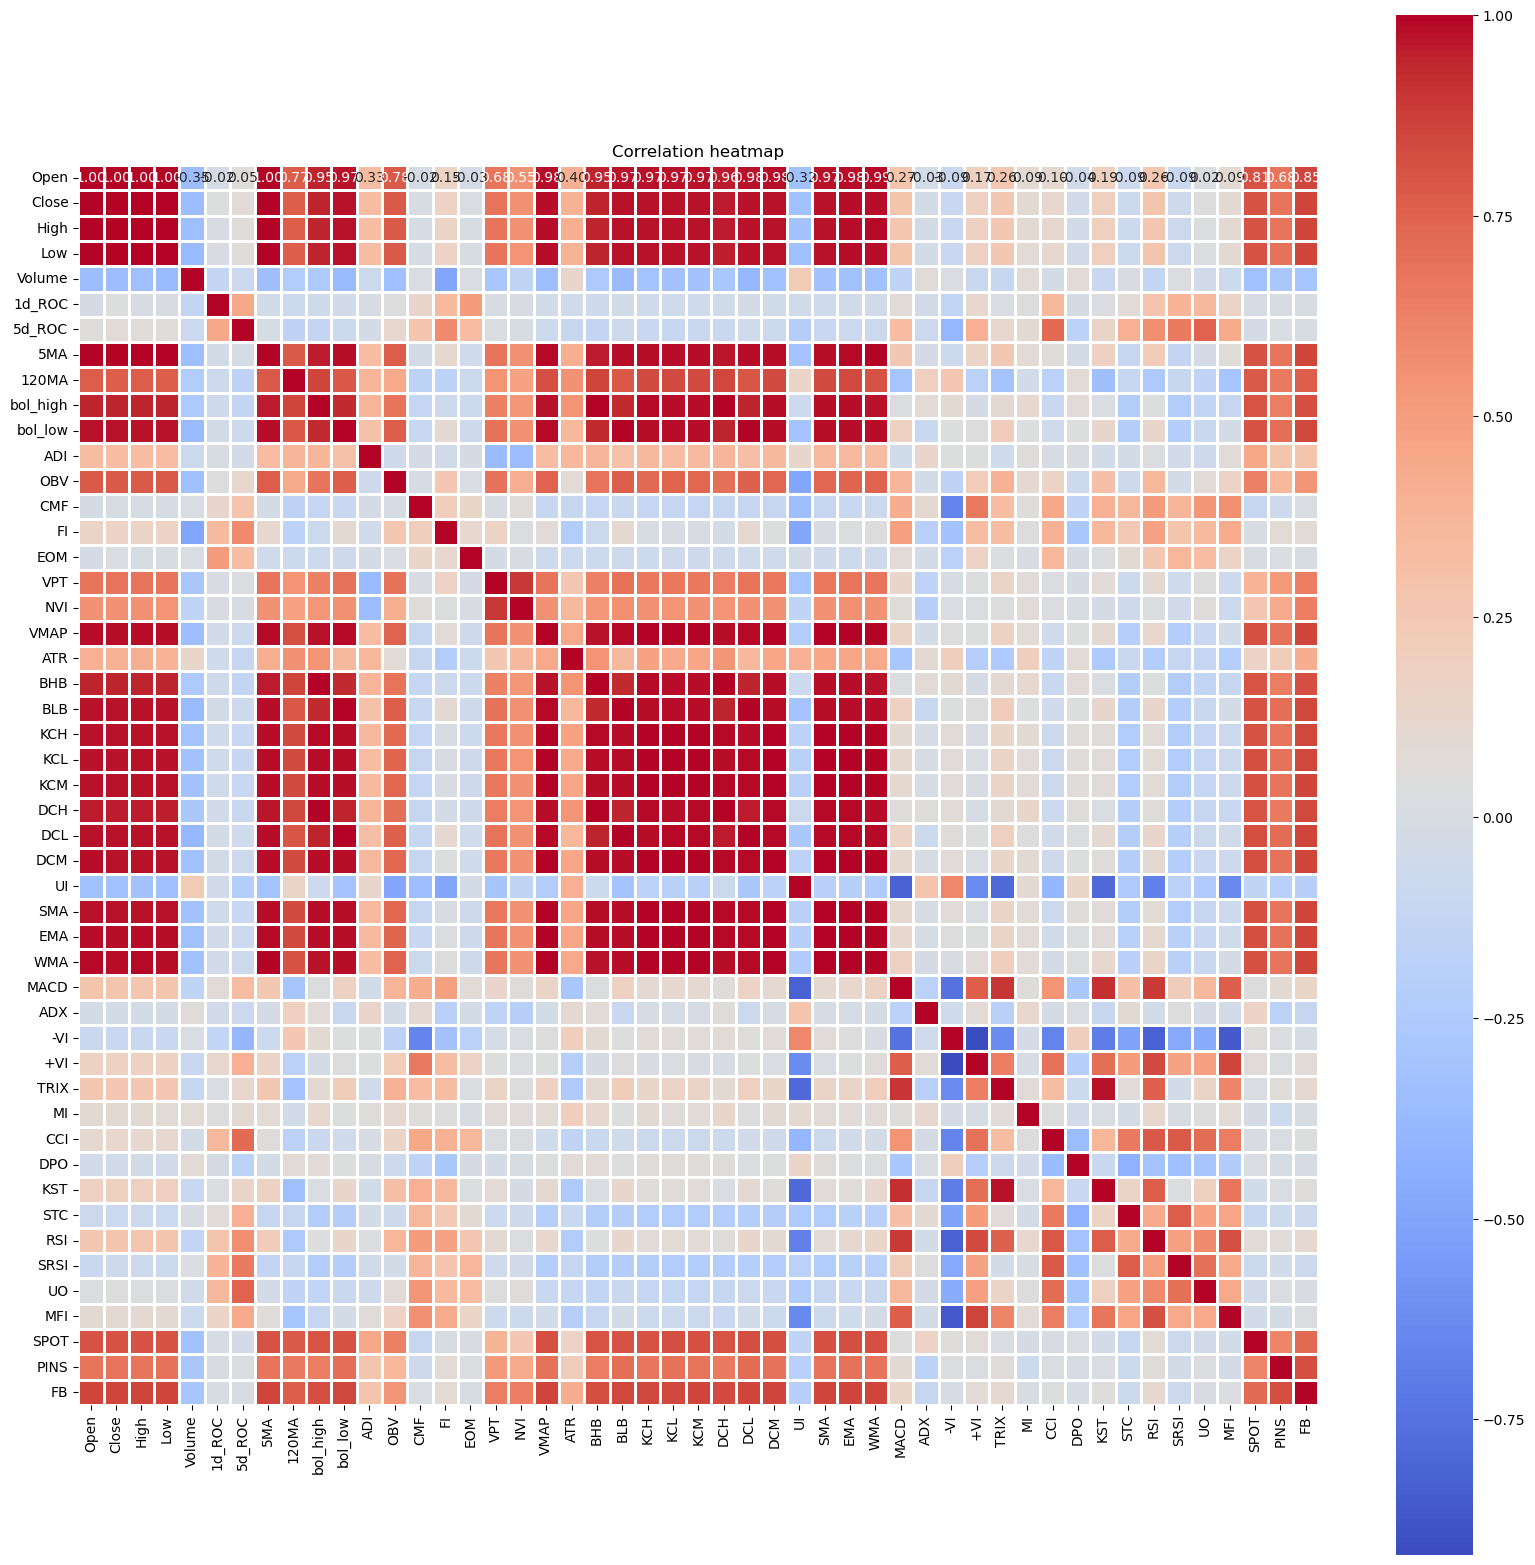

In [22]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    netflix.select_dtypes(include=['float64', 'int']).corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    square=True,
    fmt=".2f",
)

plt.title('Correlation heatmap')
plt.show()

In [23]:
netflix.drop(['VMAP', 'BHB', 'BLB', 'KCH', 'KCL', 'KCM', 'DCH', 'DCL', 'DCM', 'SMA', 'EMA', 'WMA'], axis = 1, inplace = True)
netflix.shape

(1257, 38)

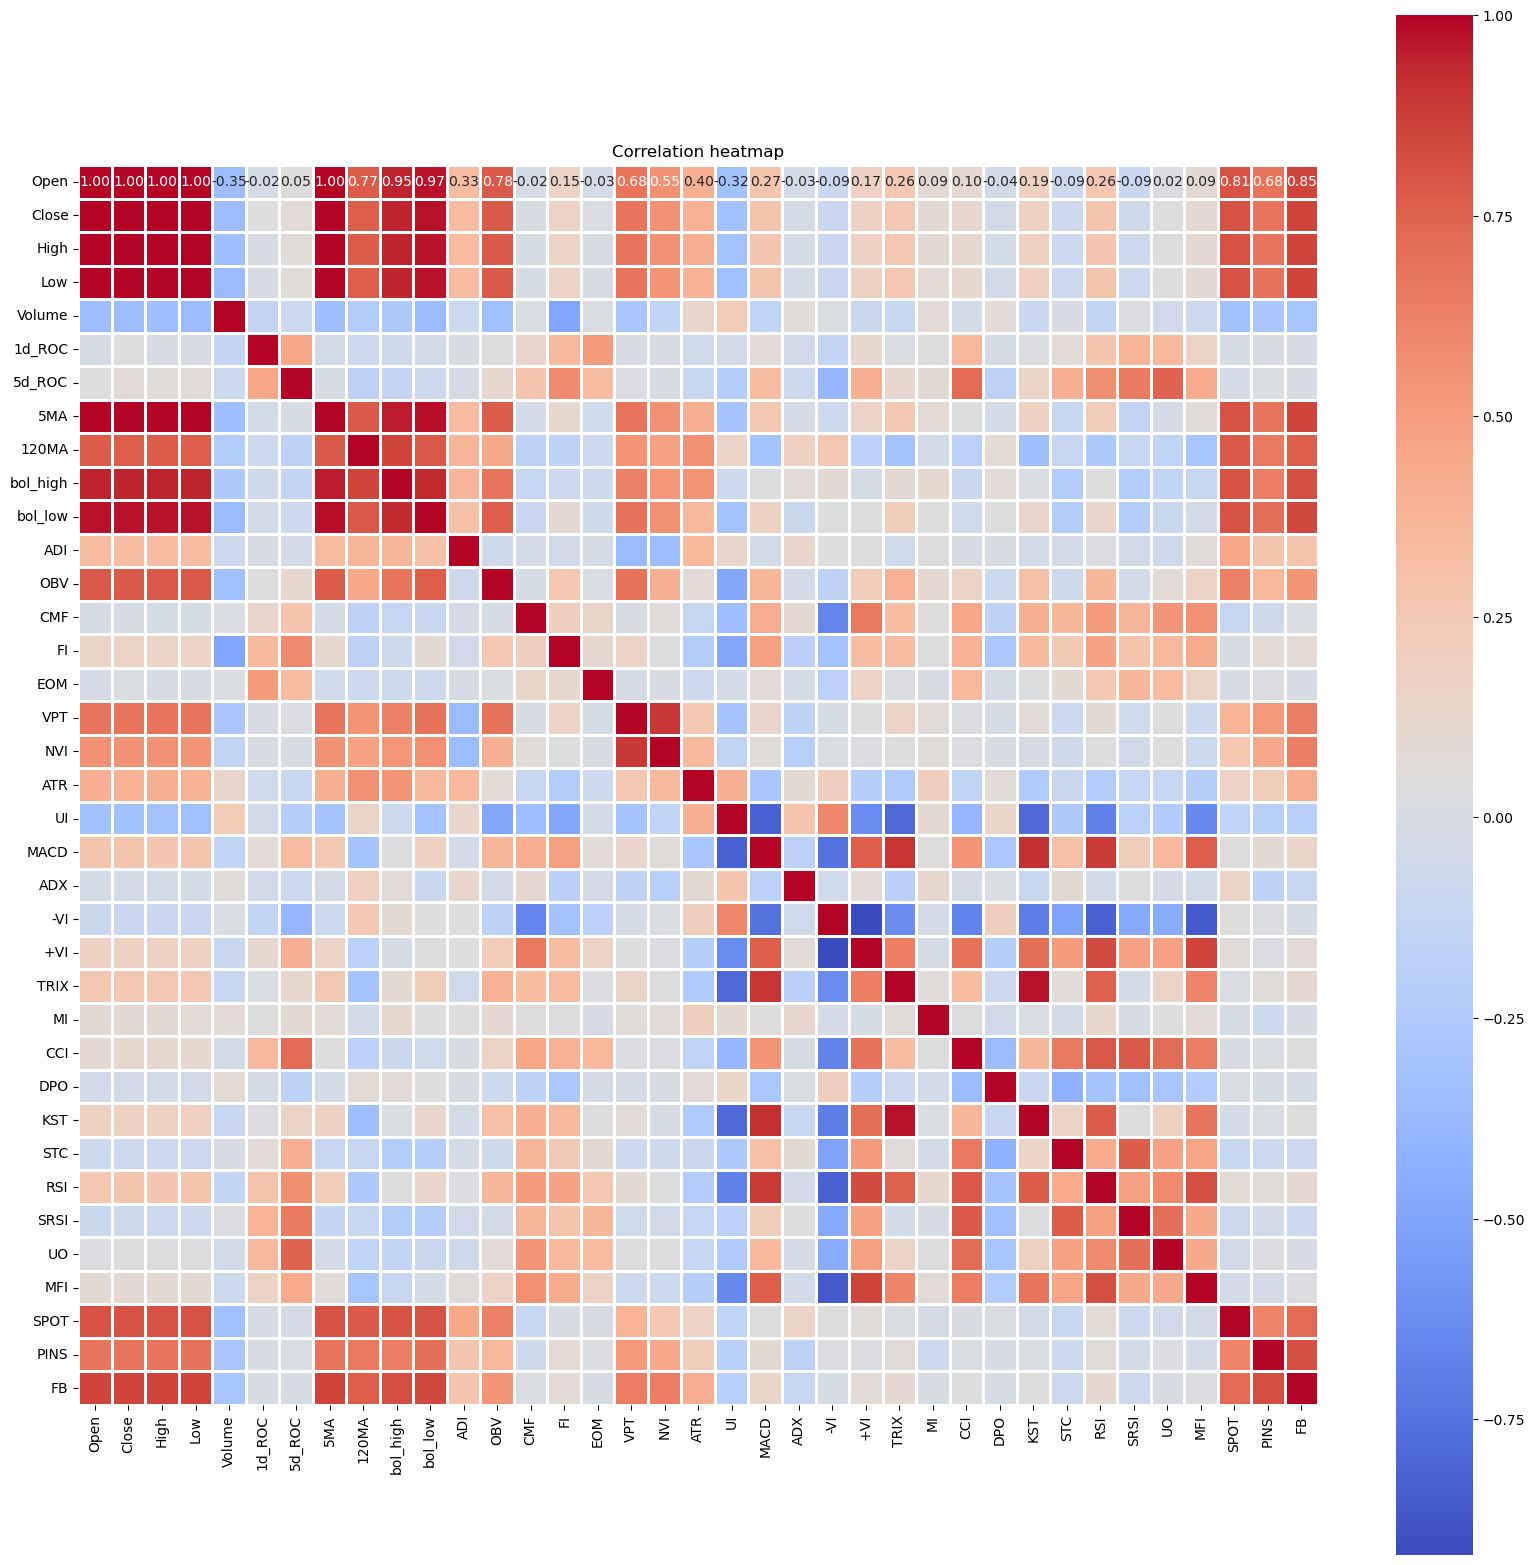

In [24]:
plt.figure(figsize=(20, 20))

sns.heatmap(
    netflix.select_dtypes(include=['float64', 'int']).corr(),
    annot=True,
    cmap='coolwarm',
    linewidths=1,
    linecolor='white',
    square=True,
    fmt=".2f",
)

plt.title('Correlation heatmap')
plt.show()

In [25]:
netflix.to_csv("netflix.csv")

## Scaling

In [ ]:
netflix = pd.read_csv("netflix.csv").drop('Unnamed: 0', axis = 1)
netflix

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
netflix[["Close", "5MA", "20MA", "60MA", "120MA", "bol_high", "bol_low"]].plot(ax = ax, color = ["b", "orange", "g", "r", "purple", "y", "y"])
ax.fill_between(netflix.index, netflix['bol_low'], netflix['bol_high'], color='yellow', alpha=0.3)
plt.grid()
plt.show()
plt.close()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
netflix[["Close", "FB", "SPOT", "PINS"]].plot(ax=ax)
plt.show()
plt.close()

In [ ]:
plt.figure(figsize = (20, 10))
netflix["Fluctuation"].plot()

In [ ]:
# 주가 변동성
plt.figure(figsize = (20, 10))
sns.histplot(data=netflix, x='Fluctuation', bins = 50, kde = True)  # bins는 구간의 개수를 의미합니다.

In [ ]:
X = netflix.drop(["Date", "Close"], axis = 1)
y = netflix["Close"]

In [ ]:
from sklearn.preprocessing import StandardScaler

# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(X)
netflix_scaled = scaler.transform(X)
netflix_scaled

In [ ]:
netflix_scaled.shape

In [ ]:
netflix_scaled = pd.DataFrame(netflix_scaled, columns = ['Open', 'High', 'Low', 'Volume', 'Fluctuation',
                   'SPOT', 'PINS', 'FB', '5_day_avg', '20_day_avg', '60_day_avg', 
                   '120_day_avg', 'bol_high', 'bol_low', 'ADI', 'OBV', 'CMF', 'FI',
                   'EOM', 'VPT', 'NVI', 'VMAP', 'ATR', 'BHB', 'BLB', 'KCH', 'KCL',
                   'KCM', 'DCH', 'DCL', 'DCM', 'UI', 'SMA', 'EMA', 'WMA', 'MACD',
                   'ADX', '-VI', '+VI', 'TRIX', 'MI', 'CCI', 'DPO', 'KST', 'Ichimoku',
                   'STC', 'RSI', 'SRSI', 'UO', 'MFI'])
netflix_scaled

## Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
WINDOW_SIZE = 20
BATCH_SIZE = 32

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
])
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'relu'))

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer='adam', metrics=['mse'])

In [ ]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=500, 
                    callbacks=[checkpoint, earlystopping])

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data)

In [ ]:
pred.shape

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
y_test[:20]

In [ ]:
netflix.columns